In [20]:
import pandas as pd
from scipy.spatial.distance import pdist,cdist, squareform

df = pd.read_csv("datasets/creditcard.csv")

In [21]:
import numpy as np

# Split features and labels
X = np.array(df.drop(columns=["Class"]))
y = df["Class"]

normal_ixs = np.where(y==0)[0]
fraud_ixs = np.where(y==1)[0]

normal_ixs_downsample = np.random.choice(normal_ixs, 5000, replace=False).tolist()
fraud_ixs_downsample = np.random.choice(fraud_ixs, 50, replace=False).tolist()
downsample = normal_ixs_downsample + fraud_ixs_downsample

X = X[downsample]
y = y[downsample]

In [22]:
X.shape, y.shape

((5050, 30), (5050,))

In [23]:
#cdist(X[normal_ixs], X[fraud_ixs])

In [24]:
#np.savetxt('credit_card_downsample', downsample, fmt='%d', delimiter=' ')

finished pca


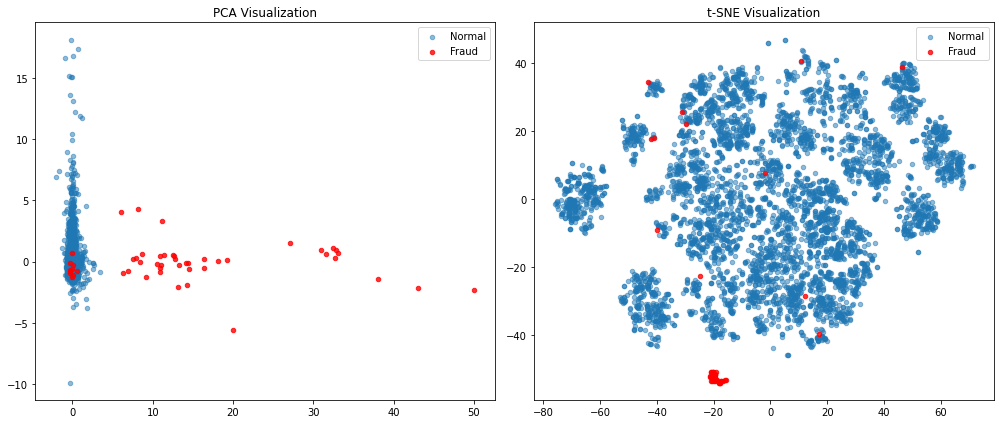

In [25]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print('finished pca')

#mds =  MDS(n_components=2)
#X_mds = mds.fit_transform(X_scaled)

# t-SNE to 2D
tsne = TSNE(n_components=2, random_state=42, init='pca',perplexity=60, n_iter=1000, learning_rate="auto")
X_tsne = tsne.fit_transform(X_scaled)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA scatter
axes[0].scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=20, alpha=0.5, label="Normal")
axes[0].scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=20, alpha=0.8, label="Fraud", c="red")
axes[0].set_title("PCA Visualization")
axes[0].legend()

# t-SNE scatter
axes[1].scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], s=20, alpha=0.5, label="Normal")
axes[1].scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], s=20, alpha=0.8, label="Fraud", c="red")
axes[1].set_title("t-SNE Visualization")
axes[1].legend()

# PCA scatter
#axes[1].scatter(X_mds[y==0, 0], X_mds[y==0, 1], s=20, alpha=0.5, label="Normal")
#axes[1].scatter(X_mds[y==1, 0], X_mds[y==1, 1], s=20, alpha=0.8, label="Fraud", c="red")
#axes[1].set_title("MDS Visualization")
#axes[1].legend()



plt.tight_layout()
plt.show()

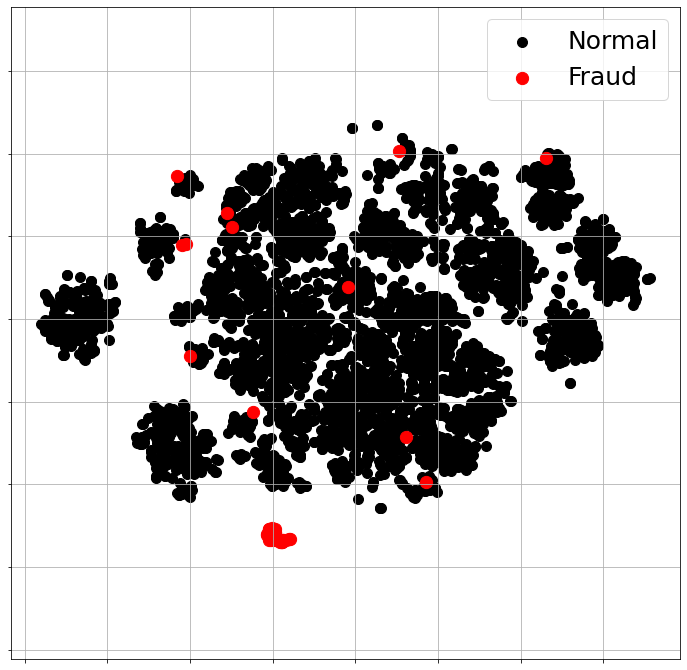

In [26]:
fig, ax = plt.subplots(figsize=(12,12))

ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], s=100,  c='black', label="Normal")
ax.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], s=150, label="Fraud", c="red")
#ax.set_title("t-SNE Visualization")
ax.legend(prop={'size': 25})

plt.savefig('visuals/credit_card/tsne1010_.png')

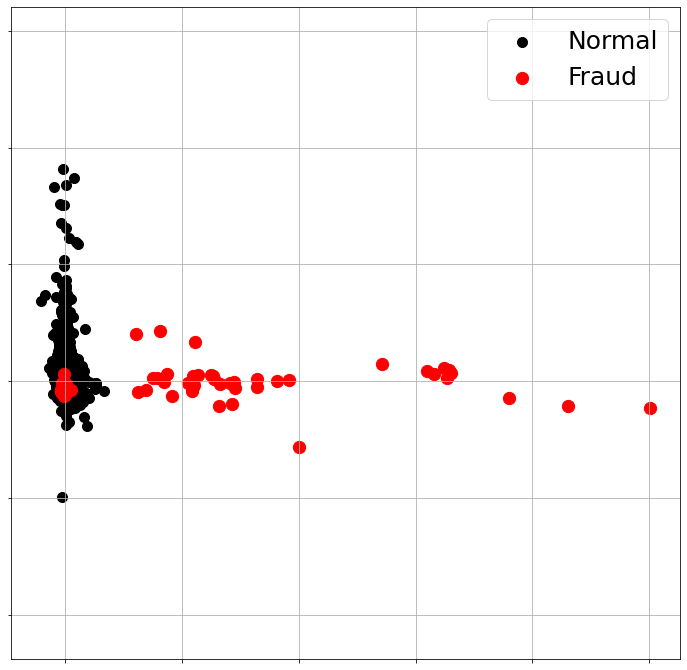

In [27]:
fig, ax = plt.subplots(figsize=(12,12))

ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=100,   c='black', label="Normal")
ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=150, label="Fraud", c="red")
#ax.set_title("t-SNE Visualization")
ax.legend(prop={'size': 25})

plt.savefig('visuals/credit_card/pca1010_.png')

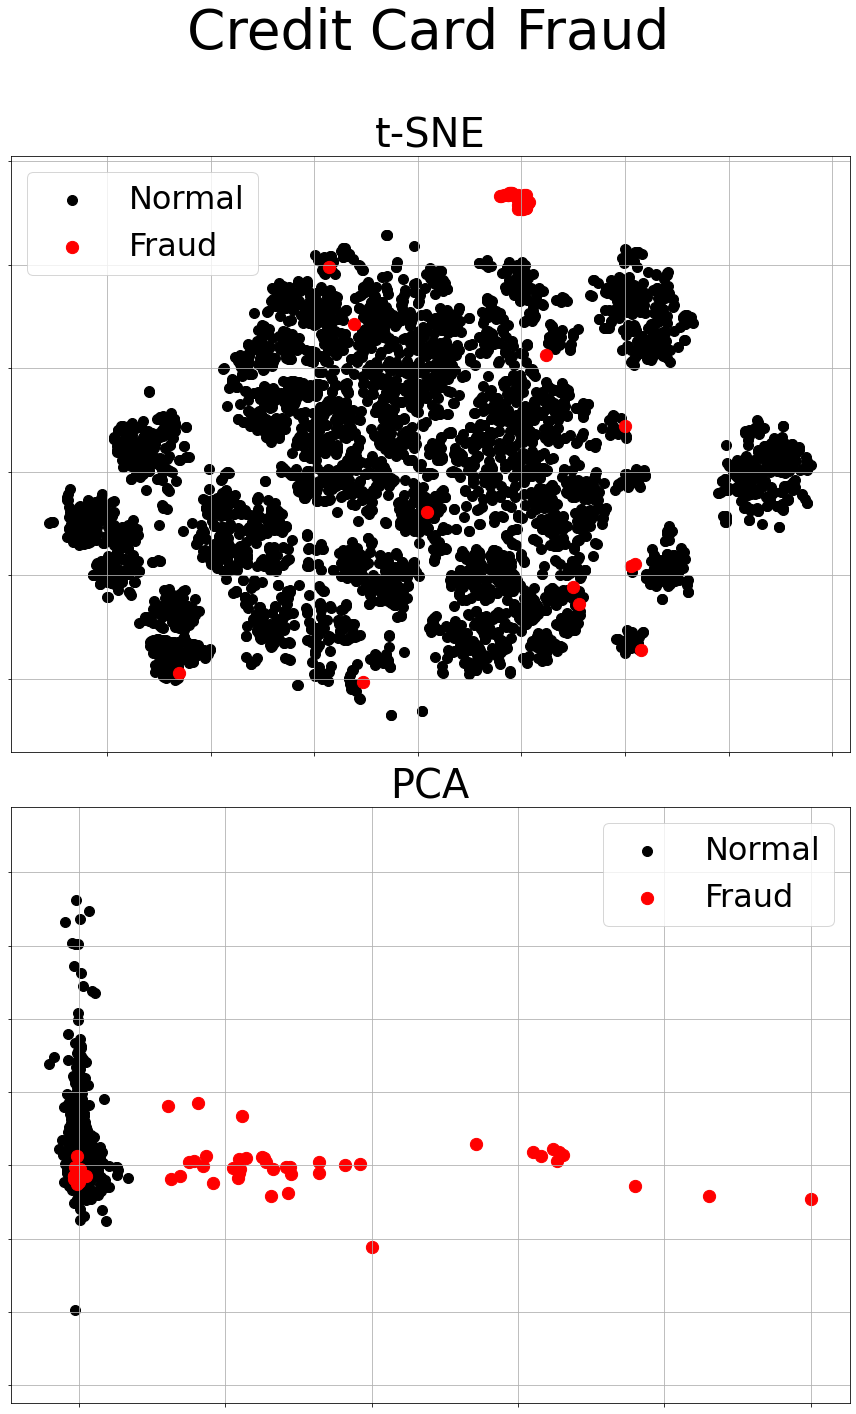

In [41]:
fig, axs = plt.subplots(2,1, figsize=(12,20))

for i in range(2):
    axs[i].grid('on')
    axs[i].axis('equal')
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

axs[0].scatter(-X_tsne[y==0, 0], -X_tsne[y==0, 1], s=100,  c='black', label="Normal")
axs[0].scatter(-X_tsne[y==1, 0], -X_tsne[y==1, 1], s=150, label="Fraud", c="red")
axs[0].set_title("t-SNE", fontsize=40)
axs[0].legend(prop={'size': 32})
#axs[0].set_title('t-SNE')

#axs[1].set_title('PCA')
axs[1].scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=100,   c='black', label="Normal")
axs[1].scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=150, label="Fraud", c="red")
axs[1].set_title("PCA", fontsize=40)
axs[1].legend(prop={'size': 32})

plt.suptitle('Credit Card Fraud\n', fontsize=55)

plt.tight_layout()
plt.savefig('visuals/credit_card/combined_fig.png')